In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
import time

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
from xgboost import XGBRegressor

In [42]:
def Explore(df):
        print('DataFrame Shape : \n')
        display(df.shape)
        print('DataFrame examples : \n')
        display(df.head())
        print("information about Dataset")
        display(df.info())
        print('DataFrame Description : \n')
        display(df.describe().T)

In [51]:
x=pd.read_csv('C:/Users/user/Downloads/neolen-house-price-prediction/train.csv',index_col='Id')
x_test=pd.read_csv('C:/Users/user/Downloads/neolen-house-price-prediction/test.csv',index_col='Id')

In [52]:
Explore(x)

DataFrame Shape : 



(1259, 80)

DataFrame examples : 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 80 columns):
MSSubClass       1259 non-null int64
MSZoning         1259 non-null object
LotFrontage      1041 non-null float64
LotArea          1259 non-null int64
Street           1259 non-null object
Alley            76 non-null object
LotShape         1259 non-null object
LandContour      1259 non-null object
Utilities        1259 non-null object
LotConfig        1259 non-null object
LandSlope        1259 non-null object
Neighborhood     1259 non-null object
Condition1       1259 non-null object
Condition2       1259 non-null object
BldgType         1259 non-null object
HouseStyle       1259 non-null object
OverallQual      1259 non-null int64
OverallCond      1259 non-null int64
YearBuilt        1259 non-null int64
YearRemodAdd     1259 non-null int64
RoofStyle        1259 non-null object
RoofMatl         1259 non-null object
Exterior1st      1259 non-null object


None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
MSSubClass,1259.0,56.914218,42.353617,20.0,20.0,50.0,70.0,190.0
LotFrontage,1041.0,70.110471,23.522213,21.0,59.0,70.0,80.0,313.0
LotArea,1259.0,10524.300238,10391.598333,1300.0,7590.0,9452.0,11611.0,215245.0
OverallQual,1259.0,6.103257,1.381394,1.0,5.0,6.0,7.0,10.0
OverallCond,1259.0,5.570294,1.119465,1.0,5.0,5.0,6.0,9.0
YearBuilt,1259.0,1971.478157,29.933659,1875.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1259.0,1984.816521,20.617506,1950.0,1966.5,1993.0,2004.0,2010.0
MasVnrArea,1252.0,103.133387,182.185126,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1259.0,443.334392,439.025793,0.0,0.0,385.0,712.0,2260.0
BsmtFinSF2,1259.0,45.725973,159.593598,0.0,0.0,0.0,0.0,1474.0


In [53]:
Explore(x_test)

DataFrame Shape : 



(201, 79)

DataFrame examples : 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,...,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal


information about Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1260 to 1460
Data columns (total 79 columns):
MSSubClass       201 non-null int64
MSZoning         201 non-null object
LotFrontage      160 non-null float64
LotArea          201 non-null int64
Street           201 non-null object
Alley            15 non-null object
LotShape         201 non-null object
LandContour      201 non-null object
Utilities        201 non-null object
LotConfig        201 non-null object
LandSlope        201 non-null object
Neighborhood     201 non-null object
Condition1       201 non-null object
Condition2       201 non-null object
BldgType         201 non-null object
HouseStyle       201 non-null object
OverallQual      201 non-null int64
OverallCond      201 non-null int64
YearBuilt        201 non-null int64
YearRemodAdd     201 non-null int64
RoofStyle        201 non-null object
RoofMatl         201 non-null object
Exterior1st      201 non-null object
Exterior2nd      201

None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
MSSubClass,201.0,56.791045,42.071678,20.0,20.00,50.0,70.00,190.0
LotFrontage,160.0,69.656250,28.839623,21.0,55.75,65.5,80.00,313.0
LotArea,201.0,10470.024876,6894.847655,1533.0,7415.00,9572.0,11526.00,63887.0
OverallQual,201.0,6.074627,1.396210,3.0,5.00,6.0,7.00,10.0
OverallCond,201.0,5.606965,1.072265,3.0,5.00,5.0,6.00,9.0
YearBuilt,201.0,1969.950249,31.884126,1872.0,1949.00,1971.0,2001.00,2008.0
YearRemodAdd,201.0,1985.174129,20.868506,1950.0,1967.00,1994.0,2004.00,2009.0
MasVnrArea,200.0,107.140000,174.300585,0.0,0.00,0.0,165.75,796.0
BsmtFinSF1,201.0,445.552239,552.434601,0.0,0.00,360.0,719.00,5644.0
BsmtFinSF2,201.0,51.706468,172.065041,0.0,0.00,0.0,0.00,1029.0


In [54]:
x.loc[:, x.dtypes == object]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
6,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
7,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
8,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
9,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml


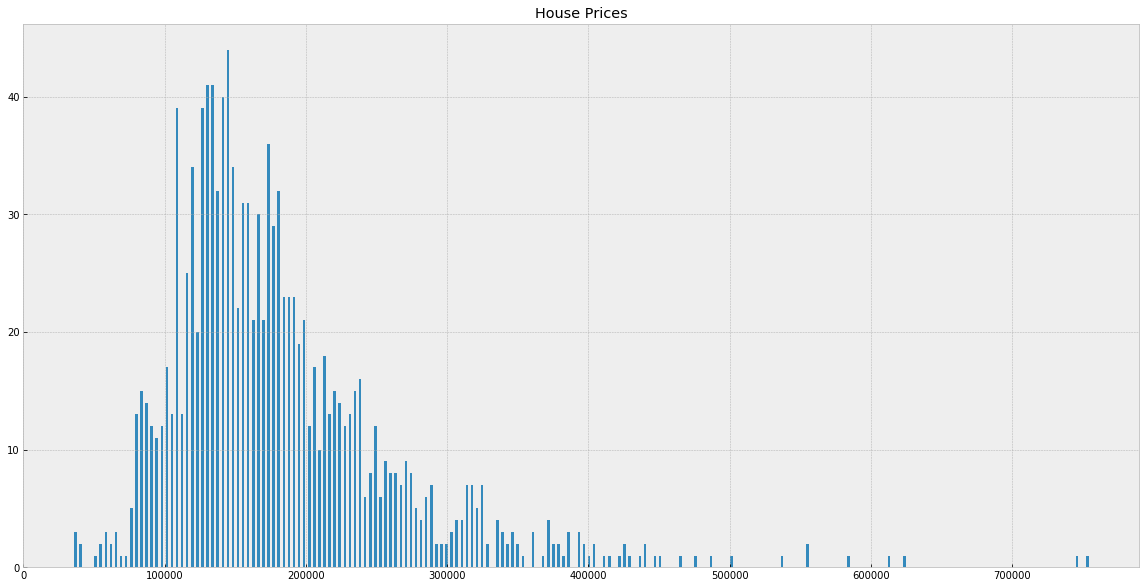

In [55]:
x['SalePrice'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('House Prices')
plt.show()

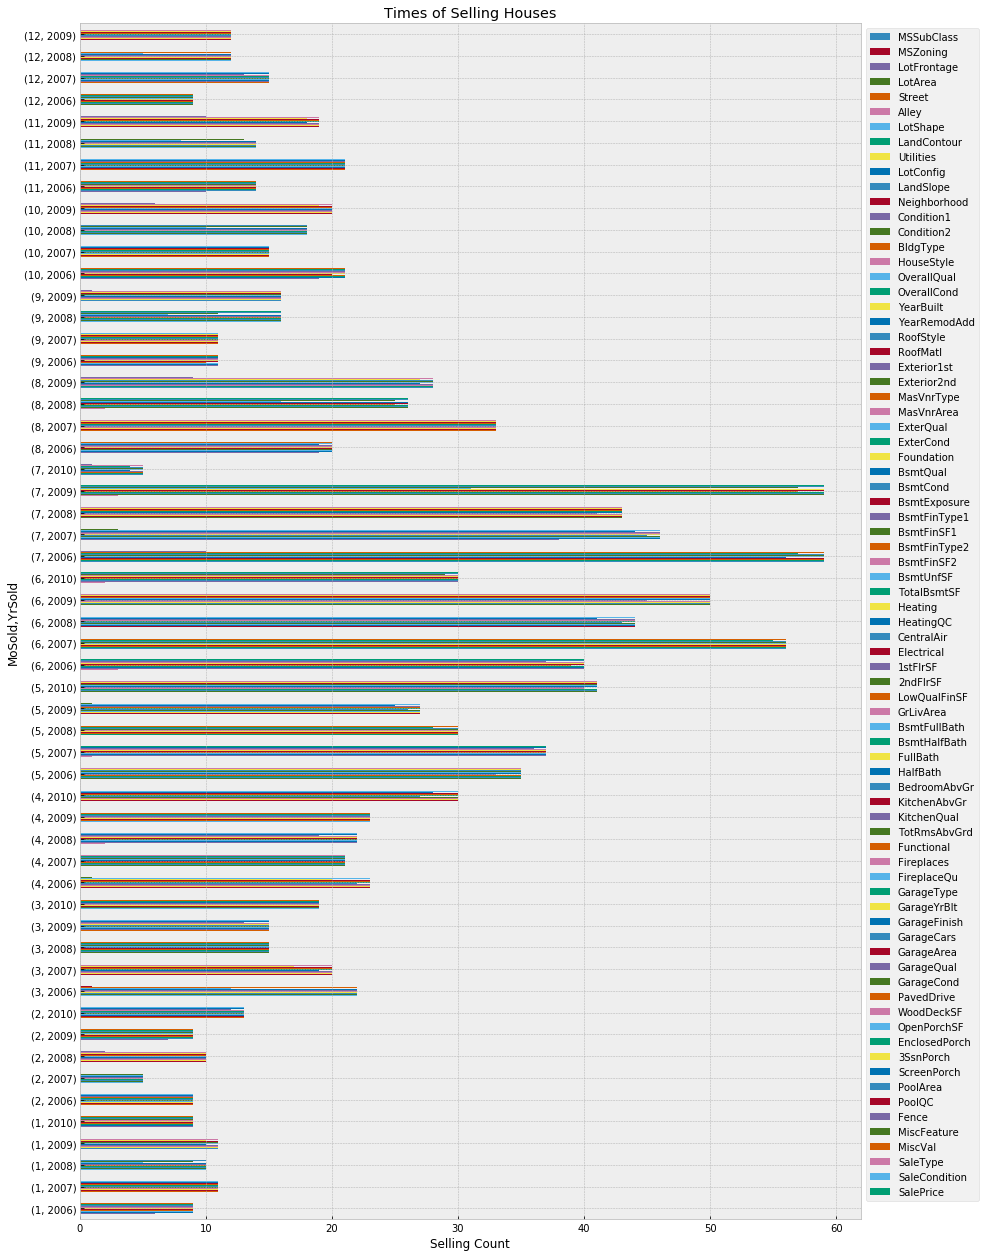

In [56]:
x.groupby(['MoSold','YrSold']).count().plot(kind='barh',figsize=(14,22))
plt.xlabel('Selling Count')
plt.title('Times of Selling Houses')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

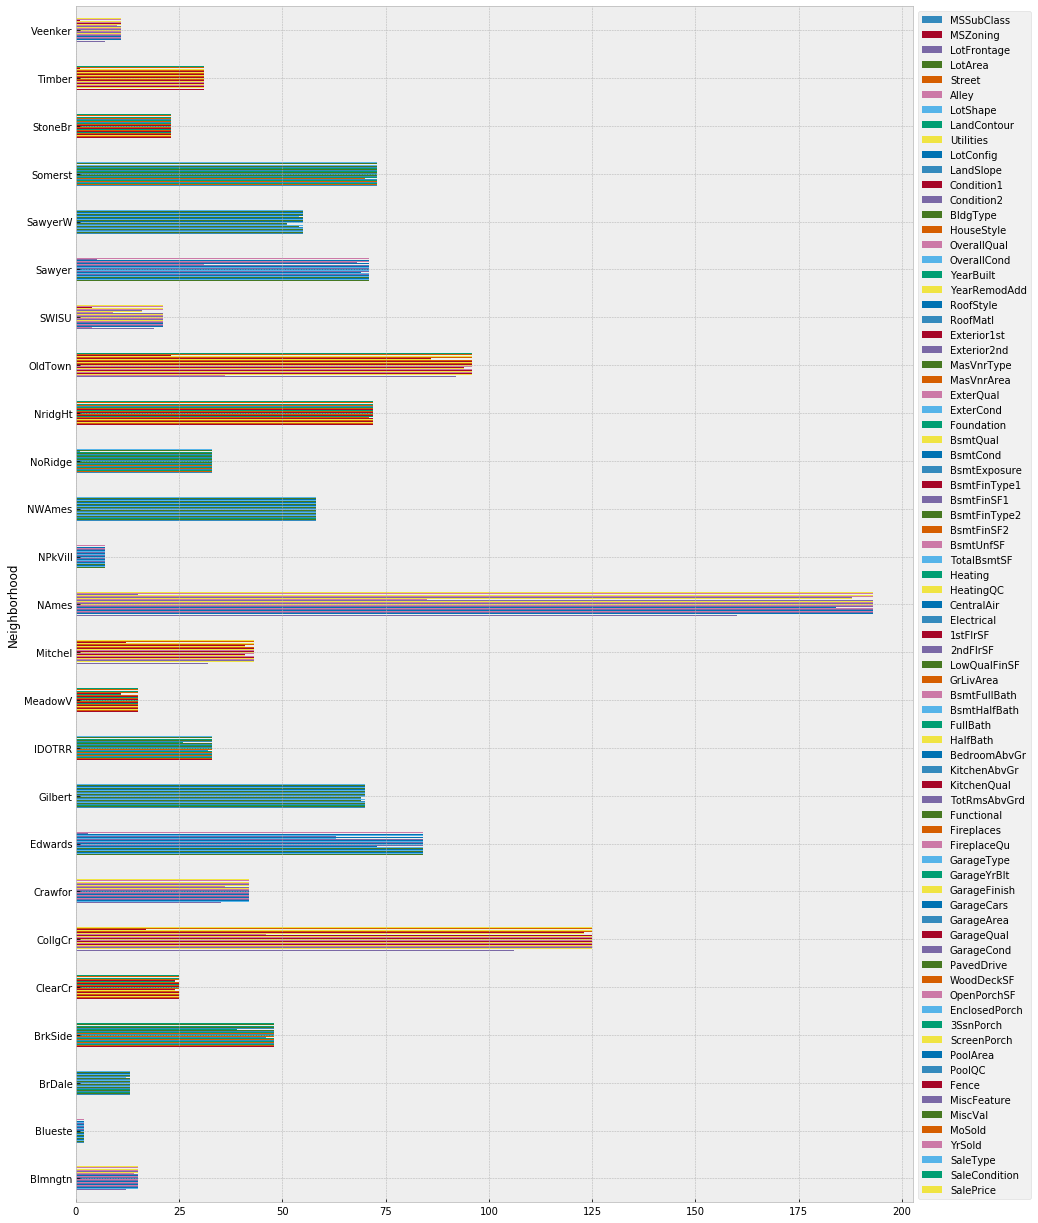

In [57]:
x.groupby(['Neighborhood']).count().plot(kind='barh',figsize=(15,22))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

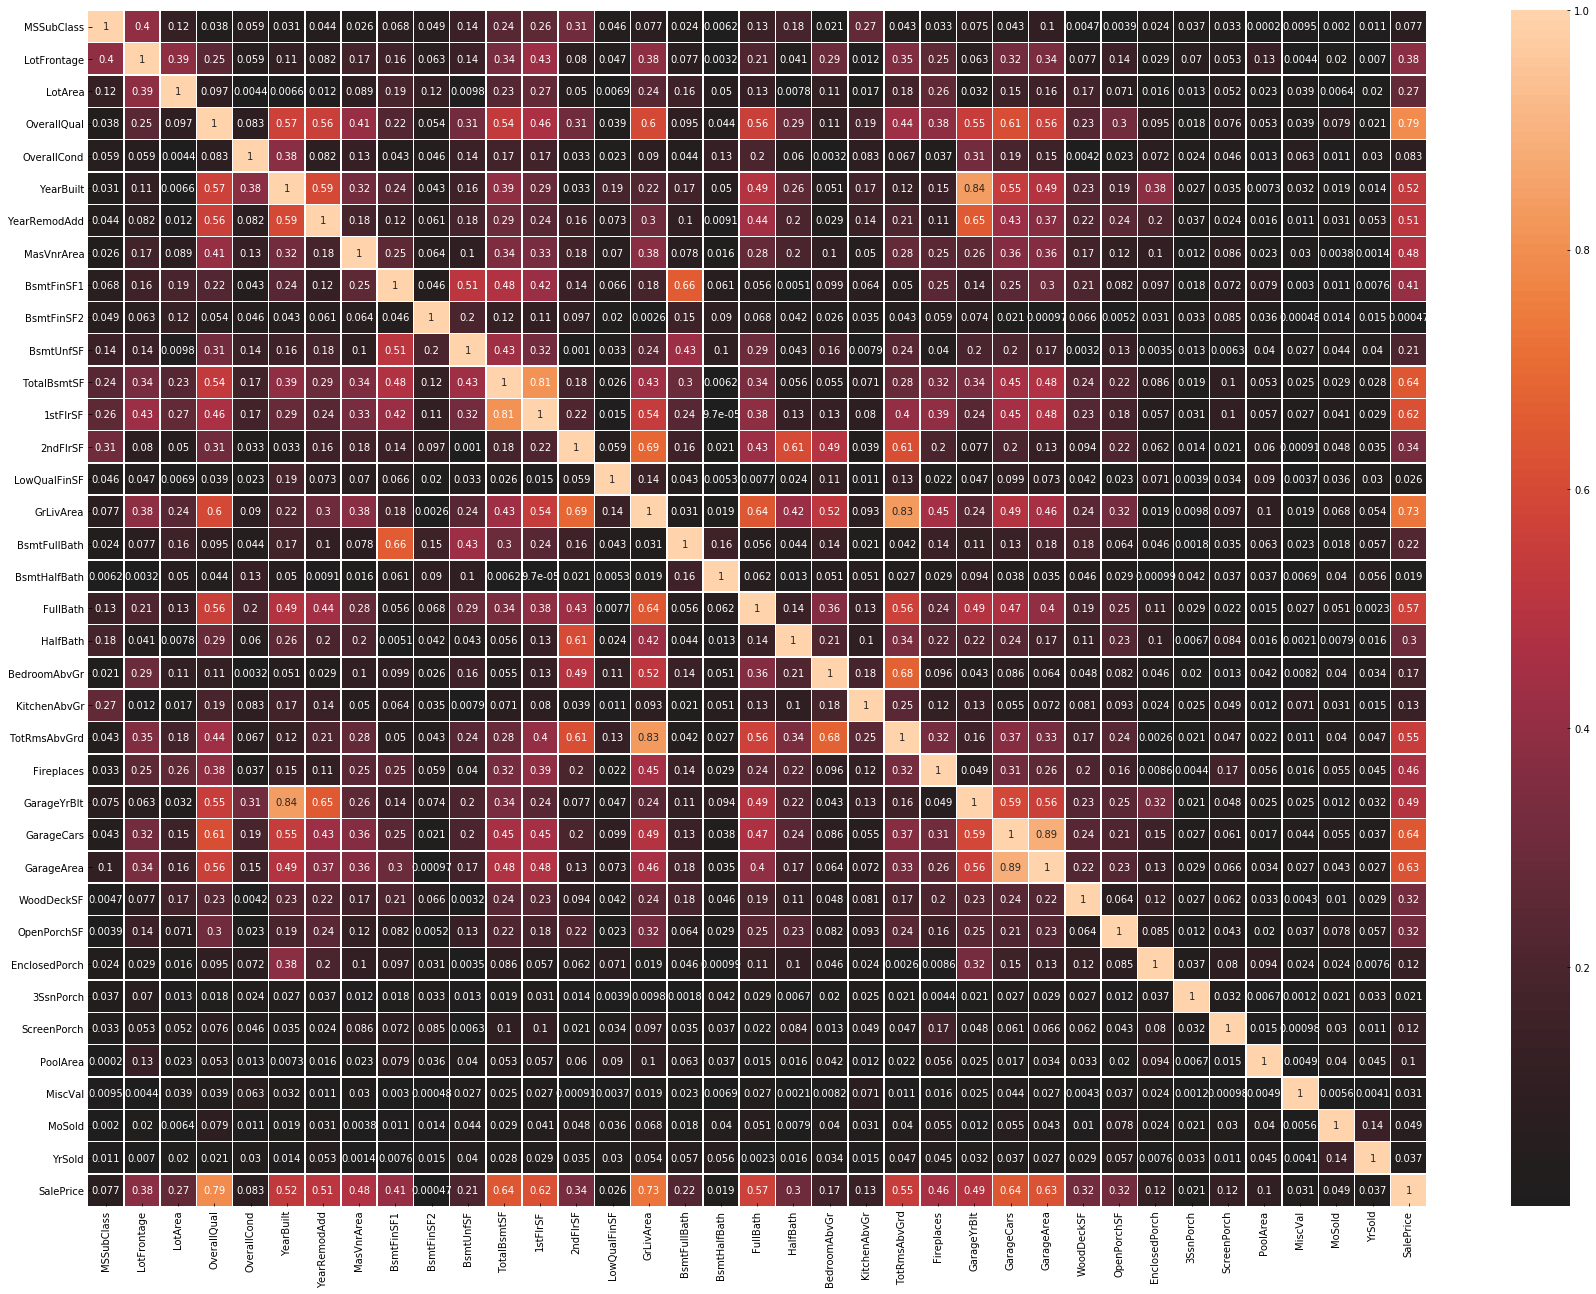

In [58]:
fig, ax = plt.subplots(figsize=(30,22))
corr_matrix = x.corr().abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)

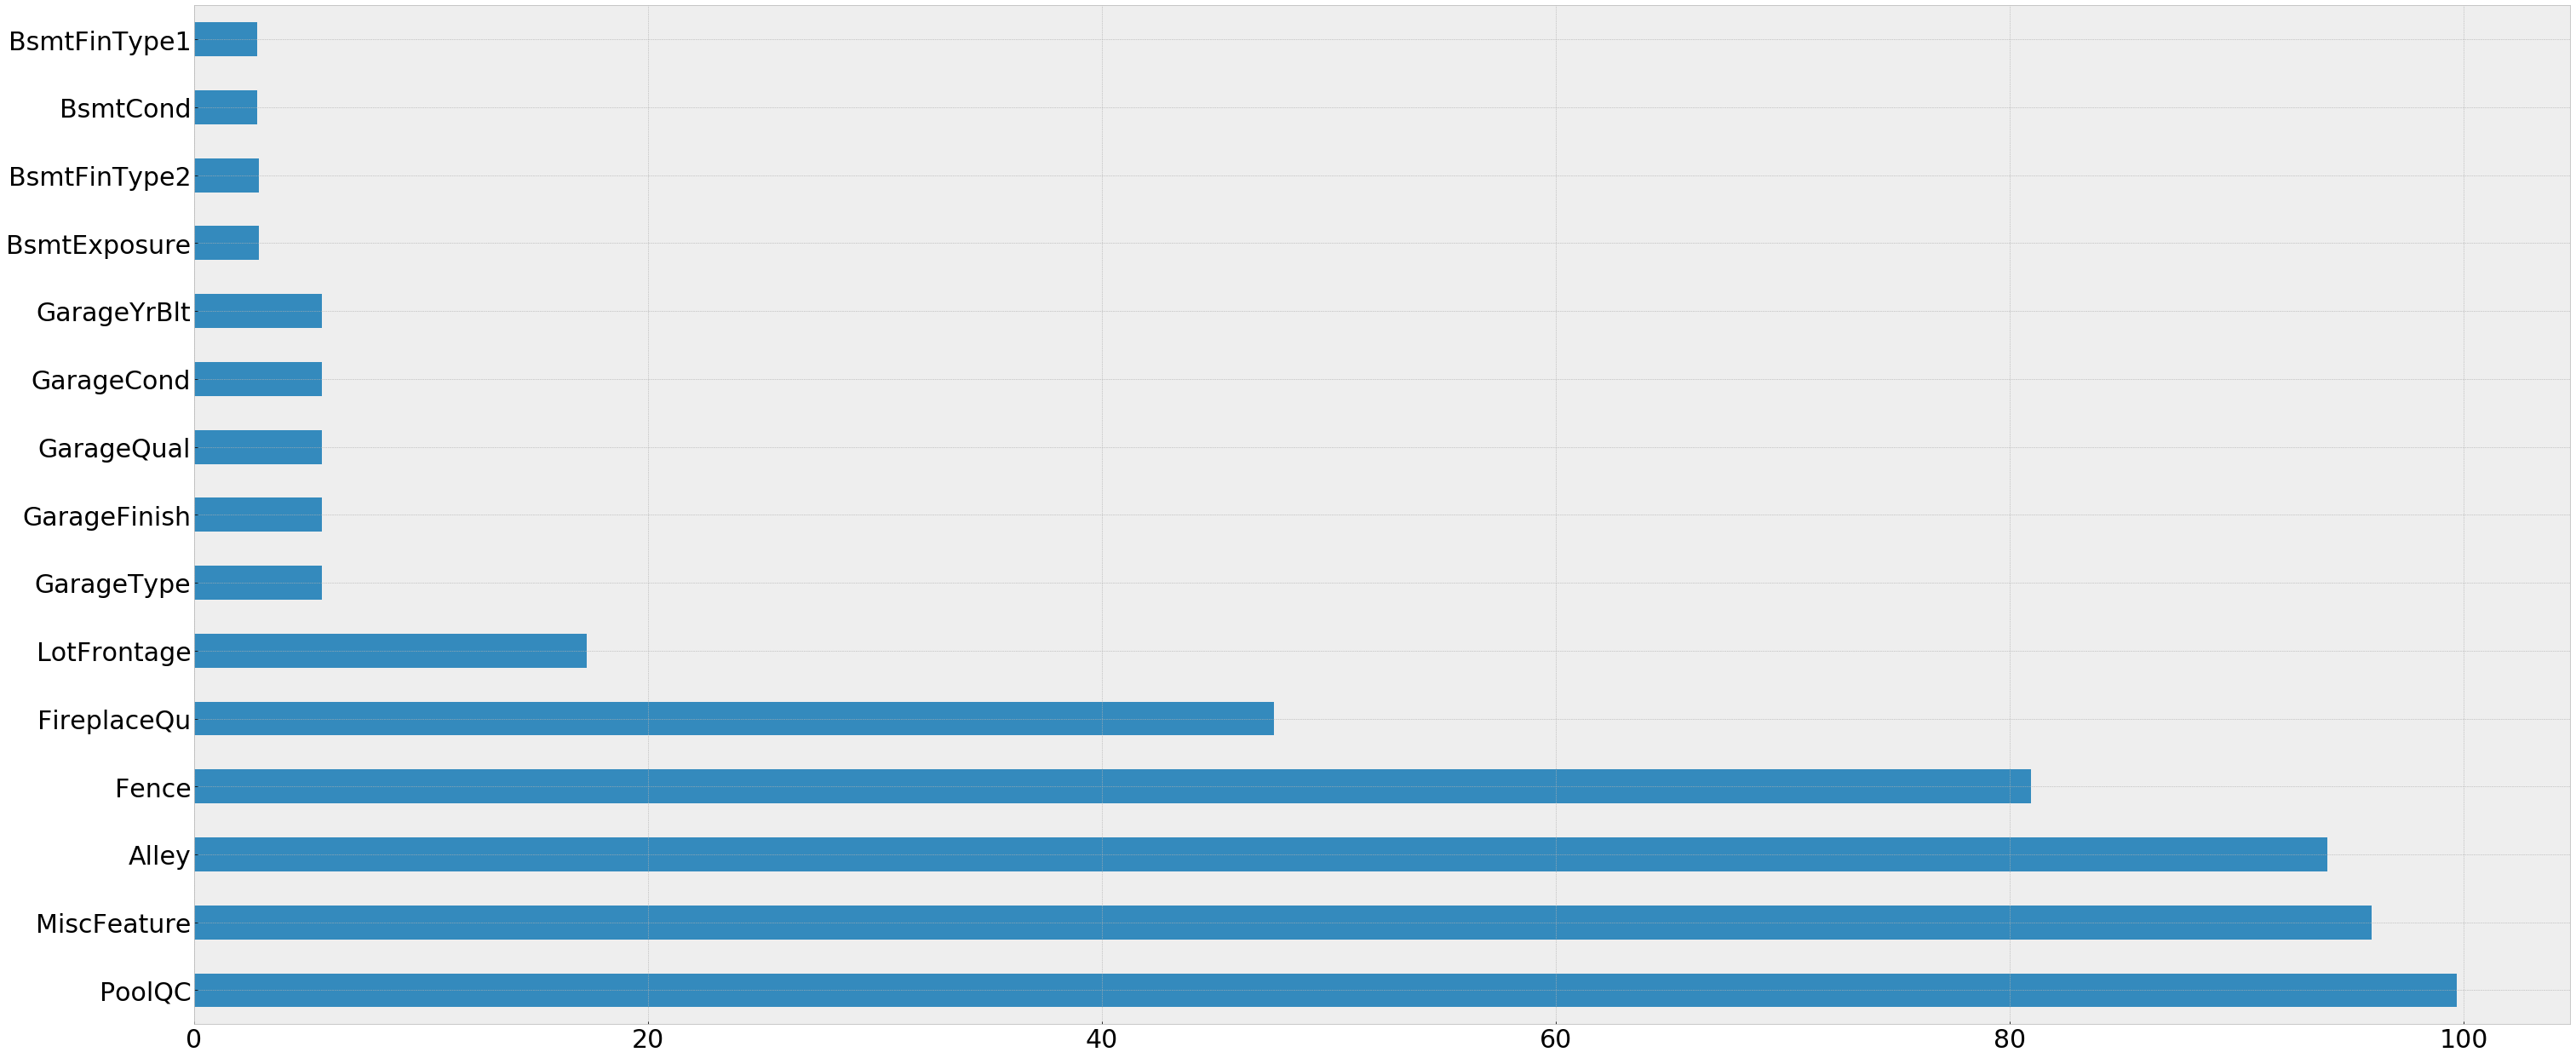

In [59]:
house_null_count=x.isnull().sum()*100/len(x)
miss_house_plot=house_null_count.sort_values(ascending=False).head(15).plot(kind='barh',figsize=(50,22),fontsize=30)

In [60]:
house_null_count.sort_values(ascending=False)[0:10]

PoolQC          99.682288
MiscFeature     95.949166
Alley           93.963463
Fence           80.937252
FireplaceQu     47.577442
LotFrontage     17.315330
GarageType       5.639396
GarageFinish     5.639396
GarageQual       5.639396
GarageCond       5.639396
dtype: float64

In [61]:
drop_columns_list=x.columns[(house_null_count/100) > .50]
drop_columns_list=list(drop_columns_list)
drop_columns_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [62]:
x.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature'], inplace=True)
x_test.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature'], inplace=True)

In [63]:
house_row_null_count=x.isnull().sum(axis=1)
house_row_null_count.describe()

count    1259.000000
mean        1.082605
std         1.677829
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

In [64]:
obj_cols=x.select_dtypes('object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [65]:
for col in obj_cols:
    print('{} column has {} unique values'.format(col,x[col].nunique()))

MSZoning column has 5 unique values
Street column has 2 unique values
LotShape column has 4 unique values
LandContour column has 4 unique values
Utilities column has 2 unique values
LotConfig column has 5 unique values
LandSlope column has 3 unique values
Neighborhood column has 25 unique values
Condition1 column has 9 unique values
Condition2 column has 8 unique values
BldgType column has 5 unique values
HouseStyle column has 8 unique values
RoofStyle column has 6 unique values
RoofMatl column has 6 unique values
Exterior1st column has 14 unique values
Exterior2nd column has 15 unique values
MasVnrType column has 4 unique values
ExterQual column has 4 unique values
ExterCond column has 5 unique values
Foundation column has 6 unique values
BsmtQual column has 4 unique values
BsmtCond column has 4 unique values
BsmtExposure column has 4 unique values
BsmtFinType1 column has 6 unique values
BsmtFinType2 column has 6 unique values
Heating column has 5 unique values
HeatingQC column has 5 

In [66]:
print(x['Utilities'].unique())
print(x['CentralAir'].unique())
print(x['LandSlope'].unique())
print(x['ExterQual'].unique())
print(x['ExterCond'].unique())
print(x['BsmtQual'].unique())
print(x['BsmtCond'].unique())
print(x['BsmtExposure'].unique())
print(x['BsmtFinType1'].unique())
print(x['BsmtFinType2'].unique())
print(x['HeatingQC'].unique())
print(x['KitchenQual'].unique())
print(x['FireplaceQu'].unique())
print(x['GarageQual'].unique())
print(x['GarageCond'].unique())

['AllPub' 'NoSeWa']
['Y' 'N']
['Gtl' 'Mod' 'Sev']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [67]:
x['Utilities'] = x.Utilities.map({'AllPub':1,'NoSeWa':0})
x['CentralAir'] = x.CentralAir.map({'Y':1,'N':0})
x['LandSlope'] = x.LandSlope.map({'Gtl':0,'Mod':1,'Sev':3})
x['ExterQual'] = x.ExterQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x['ExterCond'] = x.ExterCond.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x['BsmtQual'] = x.BsmtQual.map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
x['BsmtCond'] = x.BsmtCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4})
x['BsmtExposure'] = x.BsmtExposure.map({'No':1,'Mn':2,'Av':3,'Gd':4})
x['BsmtFinType1'] = x.BsmtFinType1.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x['BsmtFinType2'] = x.BsmtFinType2.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x['HeatingQC'] = x.HeatingQC.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x['KitchenQual'] = x.KitchenQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x['FireplaceQu'] = x.FireplaceQu.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x['GarageQual'] = x.GarageQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x['GarageCond'] = x.GarageCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

x_test['Utilities'] = x_test.Utilities.map({'AllPub':1,'NoSeWa':0})
x_test['CentralAir'] = x_test.CentralAir.map({'Y':1,'N':0})
x_test['LandSlope'] = x_test.LandSlope.map({'Gtl':0,'Mod':1,'Sev':3})
x_test['ExterQual'] = x_test.ExterQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x_test['ExterCond'] = x_test.ExterCond.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x_test['BsmtQual'] = x_test.BsmtQual.map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
x_test['BsmtCond'] = x_test.BsmtCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4})
x_test['BsmtExposure'] = x_test.BsmtExposure.map({'No':1,'Mn':2,'Av':3,'Gd':4})
x_test['BsmtFinType1'] = x_test.BsmtFinType1.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x_test['BsmtFinType2'] = x_test.BsmtFinType2.map({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
x_test['HeatingQC'] = x_test.HeatingQC.map({'Gd':3,'TA':2,'Ex':4,'Fa':1,'Po':0})
x_test['KitchenQual'] = x_test.KitchenQual.map({'Gd':2,'TA':1,'Ex':3,'Fa':0})
x_test['FireplaceQu'] = x_test.FireplaceQu.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x_test['GarageQual'] = x_test.GarageQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
x_test['GarageCond'] = x_test.GarageCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [68]:
x['BsmtQual'].fillna(0, inplace=True)
x['BsmtCond'].fillna(0, inplace=True)
x['BsmtExposure'].fillna(0, inplace=True)
x['BsmtFinType1'].fillna(0, inplace=True)
x['BsmtFinType2'].fillna(0, inplace=True)
x['FireplaceQu'].fillna(0, inplace=True)
x['GarageQual'].fillna(0, inplace=True)
x['GarageCond'].fillna(0, inplace=True)

x_test['BsmtQual'].fillna(0, inplace=True)
x_test['BsmtCond'].fillna(0, inplace=True)
x_test['BsmtExposure'].fillna(0, inplace=True)
x_test['BsmtFinType1'].fillna(0, inplace=True)
x_test['BsmtFinType2'].fillna(0, inplace=True)
x_test['FireplaceQu'].fillna(0, inplace=True)
x_test['GarageQual'].fillna(0, inplace=True)
x_test['GarageCond'].fillna(0, inplace=True)

In [69]:
print(x.shape)
print(x_test.shape)

(1259, 76)
(201, 75)


In [70]:
obj_cols=x.select_dtypes('object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
x=pd.get_dummies(x,columns=obj_cols)
x_test=pd.get_dummies(x_test,columns=obj_cols)

In [72]:
print(x.shape)
print(x_test.shape)

(1259, 222)
(201, 190)


In [73]:
corelation=abs(x.corr()['SalePrice']) >= 0.4
corelation[corelation==True]

OverallQual             True
YearBuilt               True
YearRemodAdd            True
MasVnrArea              True
ExterQual               True
BsmtQual                True
BsmtFinSF1              True
TotalBsmtSF             True
HeatingQC               True
1stFlrSF                True
GrLivArea               True
FullBath                True
KitchenQual             True
TotRmsAbvGrd            True
Fireplaces              True
FireplaceQu             True
GarageYrBlt             True
GarageCars              True
GarageArea              True
SalePrice               True
Neighborhood_NridgHt    True
Foundation_PConc        True
GarageFinish_Fin        True
GarageFinish_Unf        True
Name: SalePrice, dtype: bool

In [74]:
x=x[corelation.index[corelation]]
corelation=corelation.drop(['SalePrice'])
x_test=x_test[corelation.index[corelation]]

In [75]:
x.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,...,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,SalePrice,Neighborhood_NridgHt,Foundation_PConc,GarageFinish_Fin,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,2,3.0,706,856,4,856,...,0,0.0,2003.0,2,548,208500,0,1,0,0
2,6,1976,1976,0.0,1,3.0,978,1262,4,1262,...,1,3.0,1976.0,2,460,181500,0,0,0,0
3,7,2001,2002,162.0,2,3.0,486,920,4,920,...,1,3.0,2001.0,2,608,223500,0,1,0,0
4,7,1915,1970,0.0,1,2.0,216,756,3,961,...,1,4.0,1998.0,3,642,140000,0,0,0,1
5,8,2000,2000,350.0,2,3.0,655,1145,4,1145,...,1,3.0,2000.0,3,836,250000,0,1,0,0


In [76]:
missing_val_count_by_column = (x.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MasVnrArea      7
GarageYrBlt    71
dtype: int64


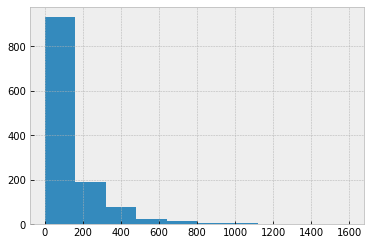

In [77]:
x['MasVnrArea'].hist()

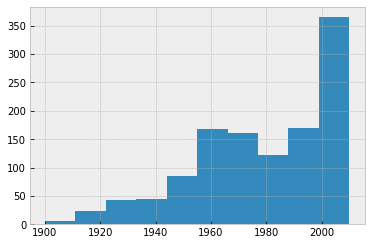

In [78]:
x['GarageYrBlt'].hist()

In [79]:
x['MasVnrArea']=x['MasVnrArea'].fillna(x['MasVnrArea'].median())
x['GarageYrBlt']=x['GarageYrBlt'].fillna(x['GarageYrBlt'].median())

x_test['MasVnrArea']=x_test['MasVnrArea'].fillna(x_test['MasVnrArea'].median())
x_test['GarageYrBlt']=x_test['GarageYrBlt'].fillna(x_test['GarageYrBlt'].median())

In [80]:
x.var()

OverallQual             1.908249e+00
YearBuilt               8.960240e+02
YearRemodAdd            4.250816e+02
MasVnrArea              3.306559e+04
ExterQual               3.286405e-01
BsmtQual                6.315407e-01
BsmtFinSF1              1.927436e+05
TotalBsmtSF             1.787806e+05
HeatingQC               9.137921e-01
1stFlrSF                1.412940e+05
GrLivArea               2.640581e+05
FullBath                3.055179e-01
KitchenQual             4.409208e-01
TotRmsAbvGrd            2.591966e+00
Fireplaces              4.118973e-01
FireplaceQu             3.251623e+00
GarageYrBlt             5.766664e+02
GarageCars              5.529081e-01
GarageArea              4.515727e+04
SalePrice               6.494430e+09
Neighborhood_NridgHt    5.396061e-02
Foundation_PConc        2.469709e-01
GarageFinish_Fin        1.837138e-01
GarageFinish_Unf        2.431713e-01
dtype: float64

In [81]:
Y=x['SalePrice']
x=x.drop(['SalePrice'],axis=1)

In [82]:
x_mean=x.mean()
x_std=x.std()
print(x_mean[x_mean>1])

x_test_mean=x_test.mean()
x_test_std=x_test.std()
print(x_test_mean[x_test_mean>1])

OverallQual        6.103257
YearBuilt       1971.478157
YearRemodAdd    1984.816521
MasVnrArea       102.559968
ExterQual          1.397141
BsmtQual           2.514694
BsmtFinSF1       443.334392
TotalBsmtSF     1054.079428
HeatingQC          3.142176
1stFlrSF        1158.503574
GrLivArea       1507.630659
FullBath           1.559174
KitchenQual        1.507546
TotRmsAbvGrd       6.493249
FireplaceQu        1.803813
GarageYrBlt     1978.518666
GarageCars         1.760127
GarageArea       471.674345
dtype: float64
OverallQual        6.074627
YearBuilt       1969.950249
YearRemodAdd    1985.174129
MasVnrArea       106.606965
ExterQual          1.388060
BsmtQual           2.512438
BsmtFinSF1       445.552239
TotalBsmtSF     1078.412935
HeatingQC          3.164179
1stFlrSF        1188.452736
GrLivArea       1564.527363
FullBath           1.601990
KitchenQual        1.537313
TotRmsAbvGrd       6.671642
FireplaceQu        1.960199
GarageYrBlt     1978.980100
GarageCars         1.810945
Garag

In [85]:
x=0.5*(np.tanh(0.01*((x-x_mean)/x_std))+1)
x_test=0.5*(np.tanh(0.01*((x_test-x_test_mean)/x_test_std))+1)

In [86]:
print(x.var())
print(x_test.var())

OverallQual             0.000025
YearBuilt               0.000025
YearRemodAdd            0.000025
MasVnrArea              0.000025
ExterQual               0.000025
BsmtQual                0.000025
BsmtFinSF1              0.000025
TotalBsmtSF             0.000025
HeatingQC               0.000025
1stFlrSF                0.000025
GrLivArea               0.000025
FullBath                0.000025
KitchenQual             0.000025
TotRmsAbvGrd            0.000025
Fireplaces              0.000025
FireplaceQu             0.000025
GarageYrBlt             0.000025
GarageCars              0.000025
GarageArea              0.000025
Neighborhood_NridgHt    0.000025
Foundation_PConc        0.000025
GarageFinish_Fin        0.000025
GarageFinish_Unf        0.000025
dtype: float64
OverallQual             0.000025
YearBuilt               0.000025
YearRemodAdd            0.000025
MasVnrArea              0.000025
ExterQual               0.000025
BsmtQual                0.000025
BsmtFinSF1              0.00

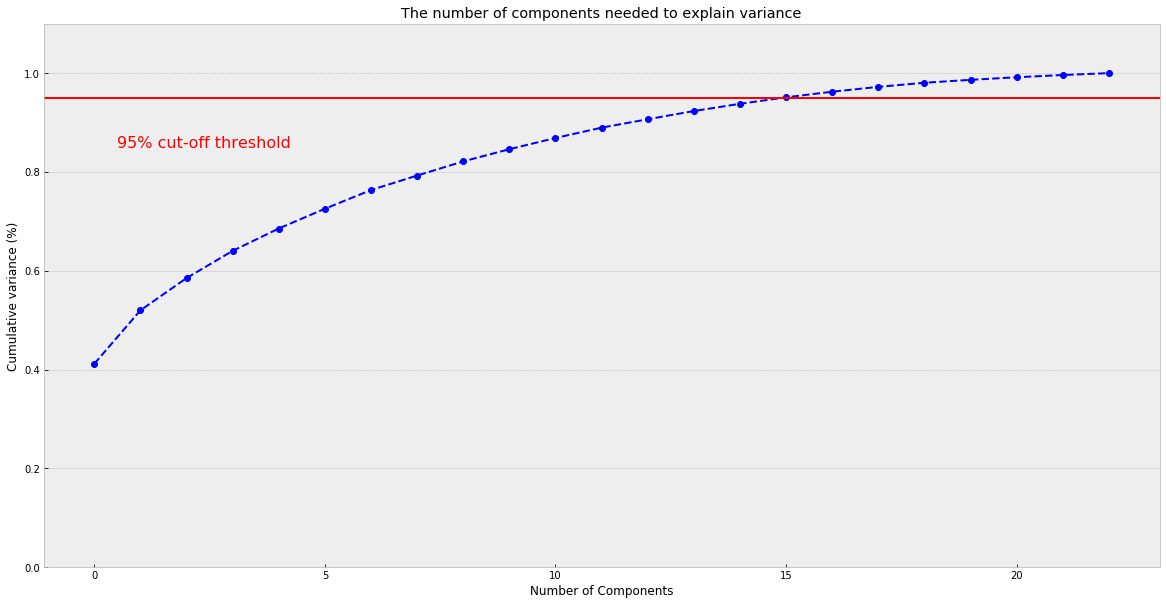

In [87]:
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [88]:
x_train, x_validate, y_train, y_validate=train_test_split(x, Y, test_size=0.20, random_state=42,shuffle=True)

In [95]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()
xgb=XGBRegressor()
adab=AdaBoostRegressor()
class_list=[lr, dt,rf,svm,xgb,adab]
for model in class_list:
        start = time.time()
        grid = GridSearchCV(estimator=model, param_grid={}, scoring='neg_mean_squared_error', cv=3, n_jobs=-1,verbose=3)
        grid.fit(x, Y)
        end = time.time()
        print(model, '\n', -grid.best_score_,'\n', round(end-start),grid.best_estimator_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
 1103154517.3437152 
 3 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
 1995938538.5043685 
 2 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 
 1122310932.3912153 
 2 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Fitting 3 folds for each of 1 candidates, tot

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror',
             predictor=None, random_state=None, reg_alpha=None, ...) 
 1313248878.368346 
 1 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) 
 1332972760.1380904 
 0 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)


In [96]:
final_model=XGBRegressor()
final_model.fit(x,Y)
final_predict=final_model.predict(x_test)
submission = pd.DataFrame({'Id': x_test.index,'SalePrice': final_predict})
submission

,Id,SalePrice
0,1260,142696.187500
1,1261,183679.359375
2,1262,119511.625000
3,1263,150874.484375
4,1264,153308.531250
5,1265,176340.671875
6,1266,168149.281250
7,1267,180927.187500
8,1268,321210.375000
9,1269,424575.250000


In [99]:
submission.to_csv('C:/Users/user/Downloads/submission_XGB_TanNorm_TopFeatures_final.csv', index=False)